### Continuing to the previous machine learning problem, let's get back to the pre-processed dataset Suicide Rates Overview 1985 to 2016 file. We would like to have a machine learning model to predict the suicide rate or even more explanatory target variables, in order to answer questions like what is the probability of a male, of this age, in that country to commit suicide. 

In [28]:
import pandas as pd
import numpy as np

##put path to your data here to interact with the rest of this notebook
df = pd.read_csv("/Users/dzikipm1/Downloads/master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### 1. [20 pts] What is the dependent variable you decided? Why?

The dependent variable I decided on is suicides/100k pop.  This statistic is most representative of how at risk a certain individual or demographic is to suicide, and thus should be what we are predicting.

### 2. [20 pts] Set the dependent variable into two categories based on a defensible criteria. (Hint: skirts of the probability density function)

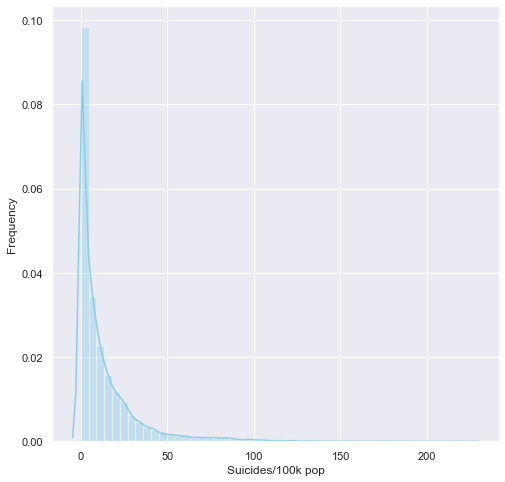

In [29]:
from scipy.stats import norm
import seaborn as sns
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(8,8)})
s = pd.Series(df["suicides/100k pop"])
ax = sns.distplot(s,
                  kde=True,
                  color='skyblue',)
ax.set(xlabel='Suicides/100k pop', ylabel='Frequency')
ax

The probability density function shows that there is a small amount of people that fall into a high rate of suicides per 100k pop.  Let's define this group as 50+ suicides per 100k pop.  By defining this cutoff, we can separate out dependent variable into 2 categories: low risk (<50) and high risk (>50).  Thus, training data will be changed to reflect this - if suicides/100k > 50, value = 1, otherwise, value = -1

In [30]:
for index, row in df.iterrows():
    if row['suicides/100k pop'] > 50:
        df.loc[index, 'suicides/100k pop'] = 1
    else:
        df.loc[index, 'suicides/100k pop'] = -1

### 3. [20 pts] Develop your classification model(s) to solve your defined problem.
### 4. [20 pts] Evaluate (and report) the model performance(s) using some of the standard techniques (e.g. 80-20 split, 10-fold cross validation, etc.)

In [31]:
# prepare data to be trained - need to encode noin numeric values, then put back into one dataframe
from sklearn.preprocessing import LabelEncoder

X = df[['country', 'age', 'country-year', 'generation', 'sex']].values
nonNumerical_le = LabelEncoder()
for x in range(0, 5):
    X[:, x] = nonNumerical_le.fit_transform(X[:,x])

xDF = pd.DataFrame({'country': X[:, 0], 'age': X[:, 1], 'country-year': X[:, 2], 'generation': X[:, 3], 'sex': X[:, 4]})
xDF['suicides/100k pop'] = df['suicides/100k pop'].astype(int)
xDF = xDF.astype(int)

df = df.drop(['country', 'sex', 'age', 'country-year', 'generation', 'suicides/100k pop', 'HDI for year'], axis = 1)
df[' gdp_for_year ($) '] = pd.to_numeric(df [' gdp_for_year ($) '].str.replace(',', ''))
result = df.join(xDF)
result.fillna(0)

,year,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),country,age,country-year,generation,sex,suicides/100k pop
0,1987,21,312900,2156624900,796,0,0,0,2,1,-1
1,1987,16,308000,2156624900,796,0,2,0,5,1,-1
2,1987,14,289700,2156624900,796,0,0,0,2,0,-1
3,1987,1,21800,2156624900,796,0,5,0,1,1,-1
4,1987,9,274300,2156624900,796,0,1,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,107,3620833,63067077179,2309,100,2,2320,2,0,-1
27816,2014,9,348465,63067077179,2309,100,5,2320,5,0,-1
27817,2014,60,2762158,63067077179,2309,100,3,2320,3,1,-1
27818,2014,44,2631600,63067077179,2309,100,3,2320,3,0,-1


In [32]:
from sklearn.model_selection import train_test_split
#80 20 split for training vs test
X = result.loc[:, result.columns != 'suicides/100k pop'].values
y = result.loc[:, result.columns == 'suicides/100k pop'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

In [33]:
#time to train the model - decided to use the one class SVM

from sklearn.svm import OneClassSVM 

clf = OneClassSVM(kernel = 'linear', gamma='auto').fit(X_train, y_train)
y_pred = clf.predict(X_test) 

### 5. [20 pts] Using your classifier model, what is the predicted category of your dependent variable for the input: "year=2000, generation=Generation X, age=20, gender=male"?

In [34]:
#replace values with encoded values
X_predict = [[2000,0,0,0,0,0,0, 0, 2, 1]]
y_predict = clf.predict(X_predict)
print('predicted ' ,y_predict[0])

predicted  -1


Predicted value 0f -1, meaning the input is predicted to be not at risk

### 6. [20 pts bonus] Using your (perhaps a different?) model, what is the actual probability of a "Generation X 20-year-old male living in a country with 40000 gdp_per_capita" would commit suicide?

This problem is different, in that it is asking for a numerical prediction, instead of a binary classification.  Thus, a different model must be used.  I will use linear regression.

In [39]:
from sklearn.linear_model import LinearRegression
df = pd.read_csv("/Users/dzikipm1/Downloads/master.csv")

X = df[['country', 'age', 'country-year', 'generation', 'sex']].values
nonNumerical_le = LabelEncoder()
for x in range(0, 5):
    X[:, x] = nonNumerical_le.fit_transform(X[:,x])

xDF = pd.DataFrame({'country': X[:, 0], 'age': X[:, 1], 'country-year': X[:, 2], 'generation': X[:, 3], 'sex': X[:, 4]})
xDF['suicides/100k pop'] = df['suicides/100k pop'].astype(int)
xDF = xDF.astype(int)

df = df.drop(['country', 'sex', 'age', 'country-year', 'generation', 'suicides/100k pop', 'HDI for year'], axis = 1)
df[' gdp_for_year ($) '] = pd.to_numeric(df [' gdp_for_year ($) '].str.replace(',', ''))

result = df.join(xDF)
result.fillna(0)

X = result.loc[:, result.columns != 'suicides/100k pop'].values
y = result.loc[:, result.columns == 'suicides/100k pop'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

#replace values with encoded values
X_predict = [[2000,0,0,0,0,0,0, 0, 2, 1]]
y_predict = regressor.predict(X_predict)
print("predicted suicide rate per 100k pop is: " , y_predict)

predicted suicide rate per 100k pop is:  [11.72131371]
